## Notebook GUI for recommending cells based on regularized autoencoders

2021-12-16 13:45:26.690098: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Extracted cells will be at:  /data02/AZC/AI_XRF/annotated_XRF/raw_cells
Please open directory for an xrf image and select any tif file from any channel.


<IPython.core.display.Javascript object>


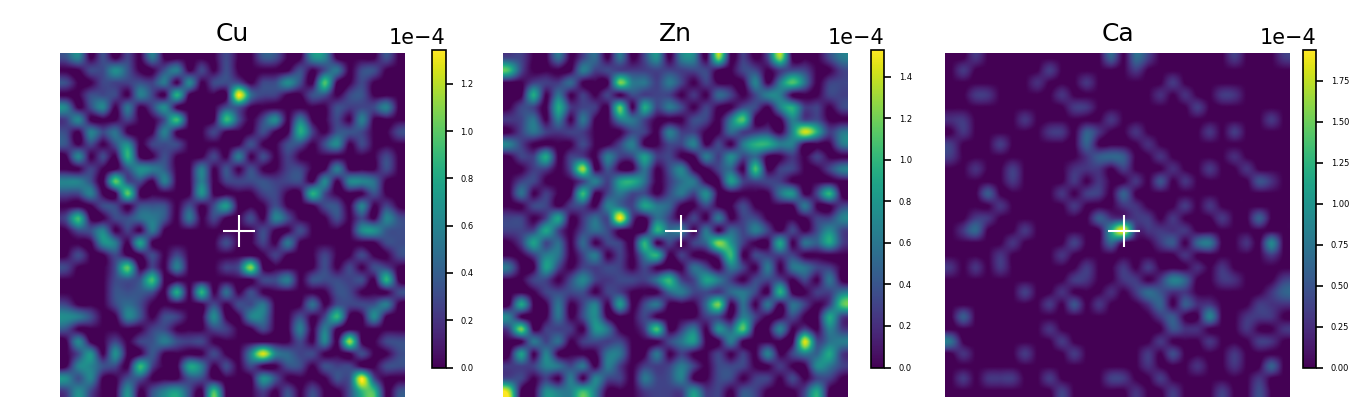

<IPython.core.display.Javascript object>


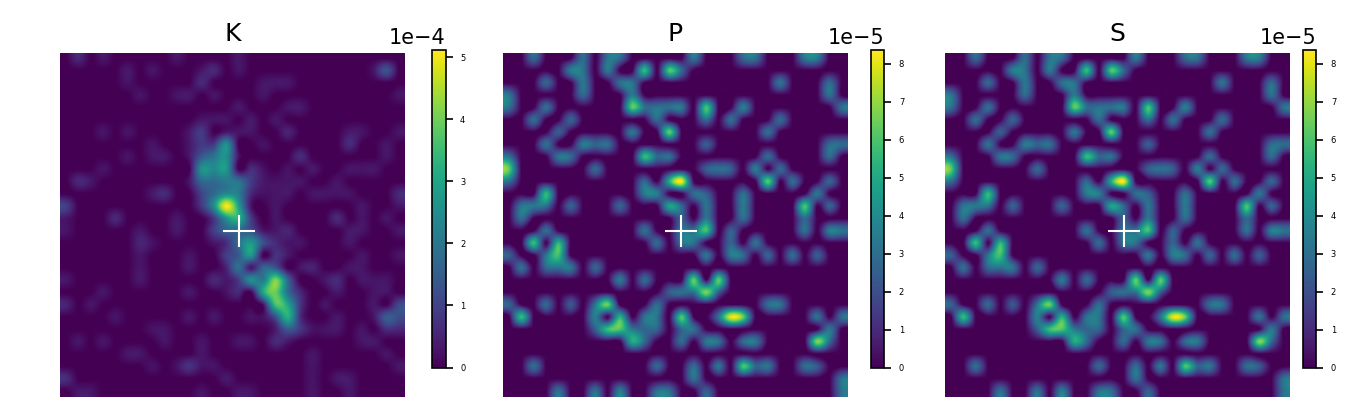

<IPython.core.display.Javascript object>


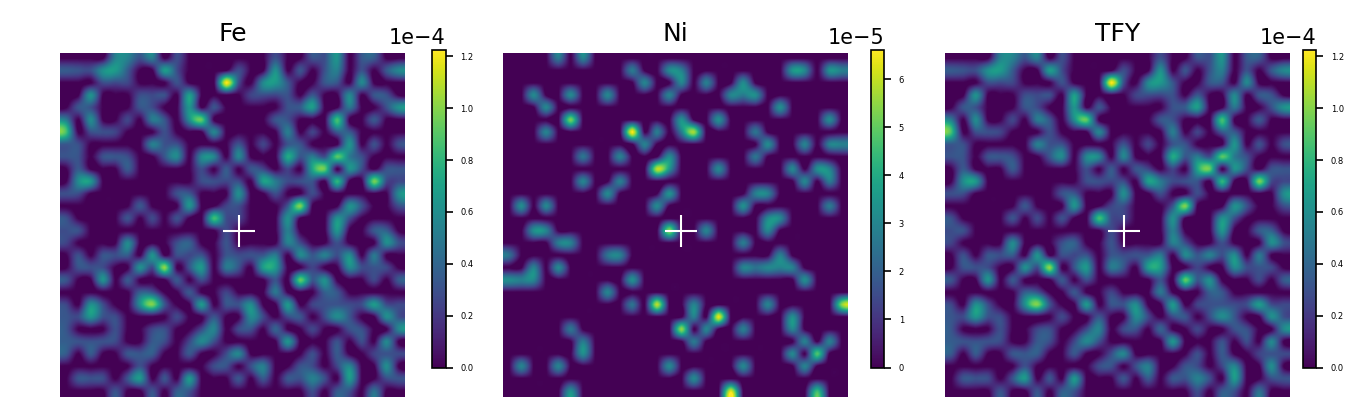

<IPython.core.display.Javascript object>


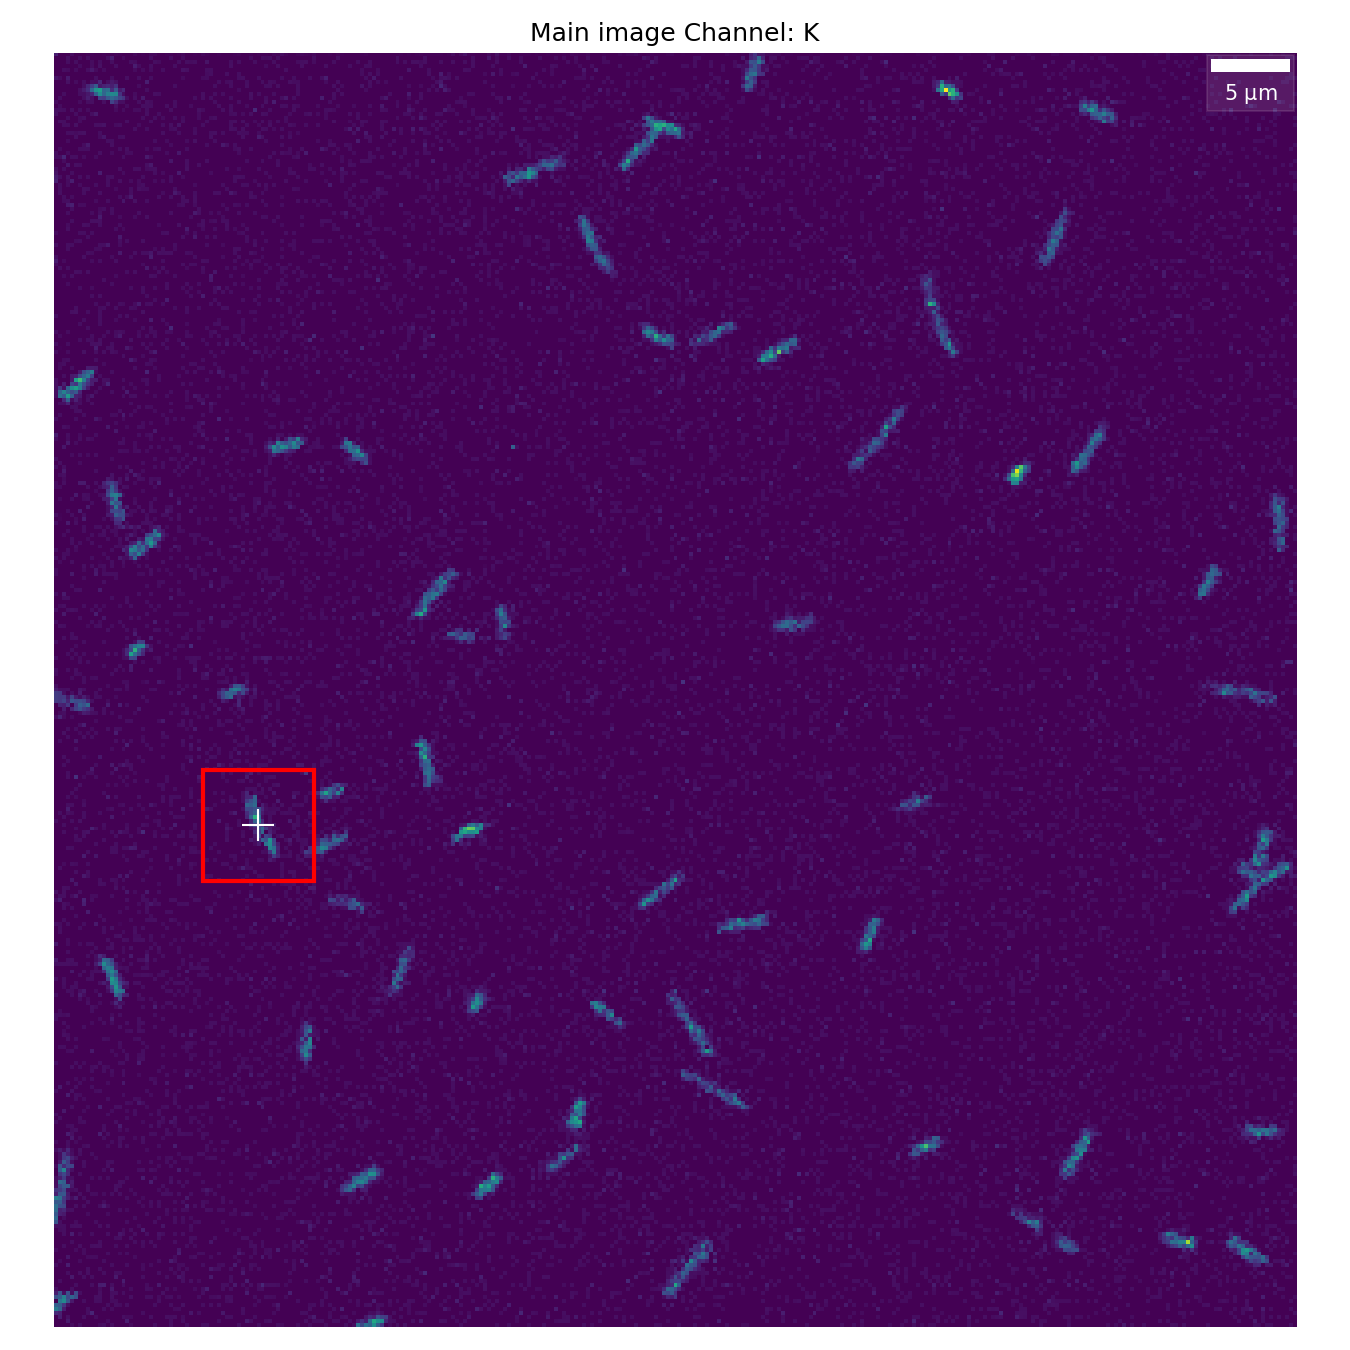

<IPython.core.display.Javascript object>


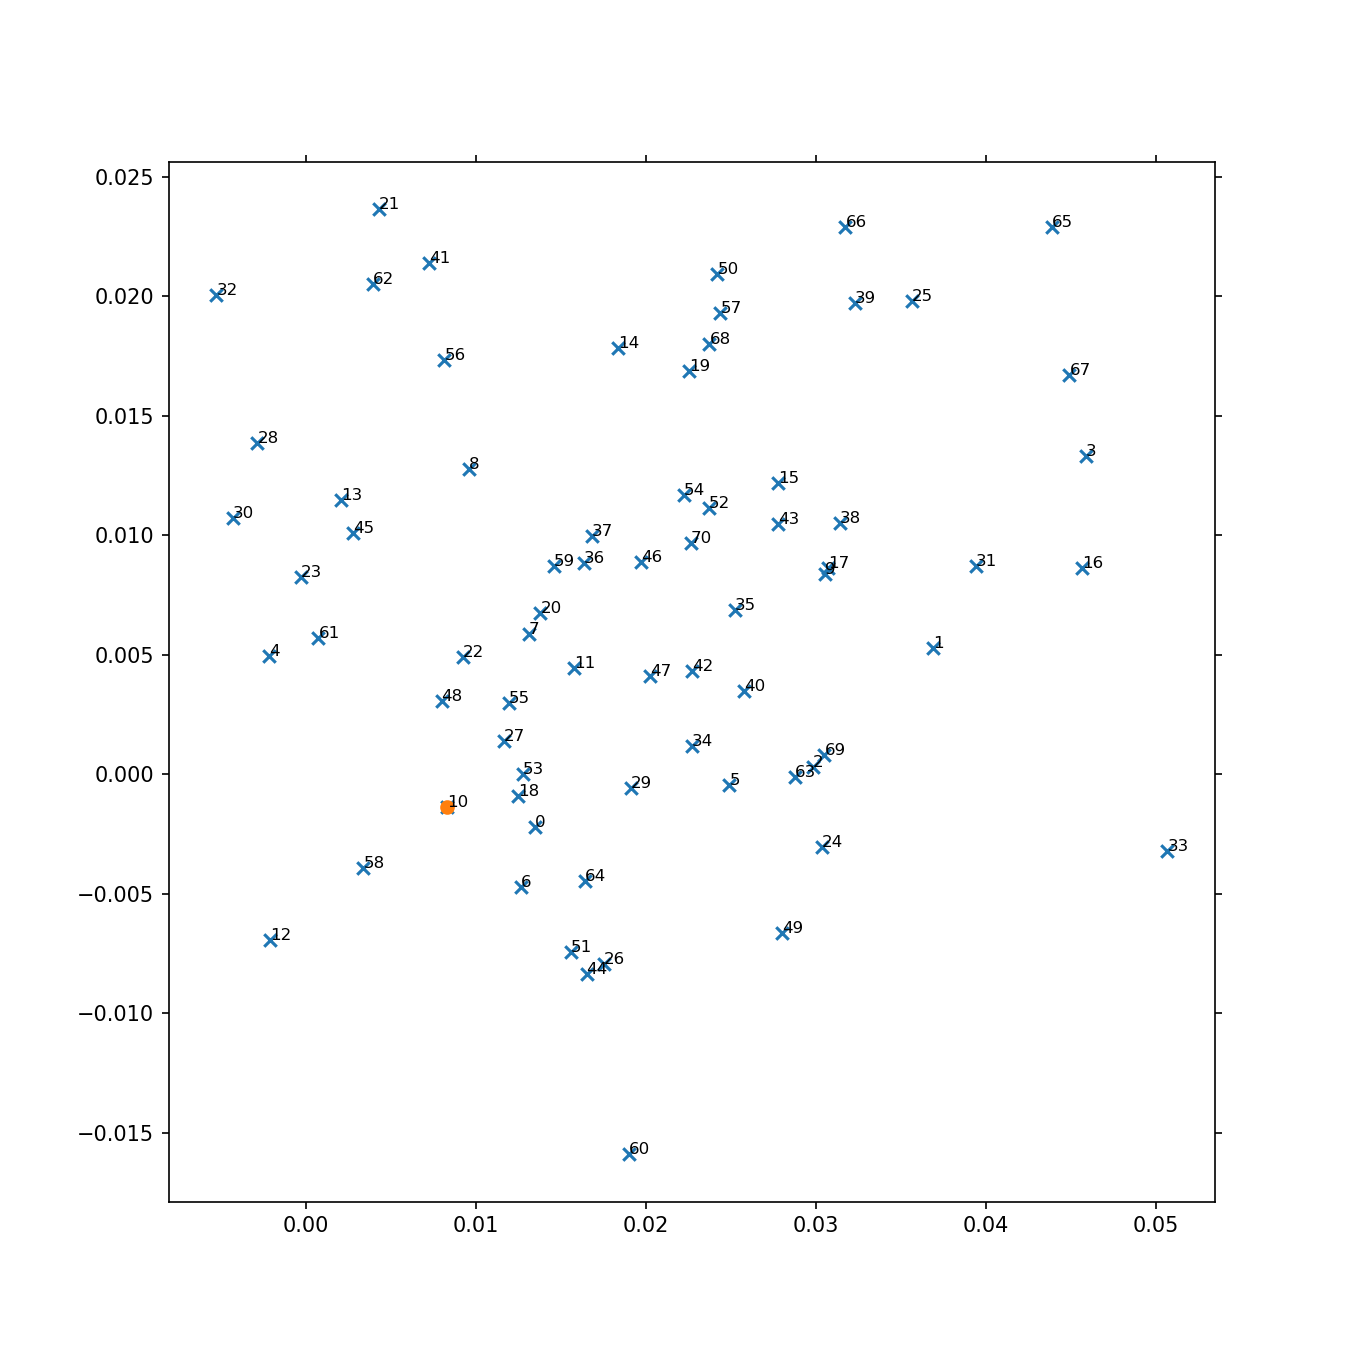

<IPython.core.display.Javascript object>


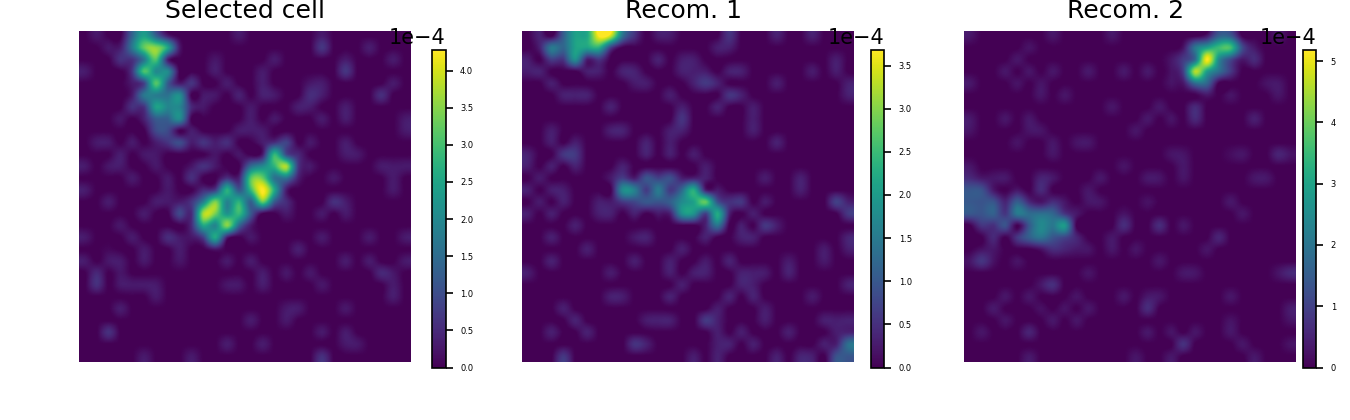

<IPython.core.display.Javascript object>


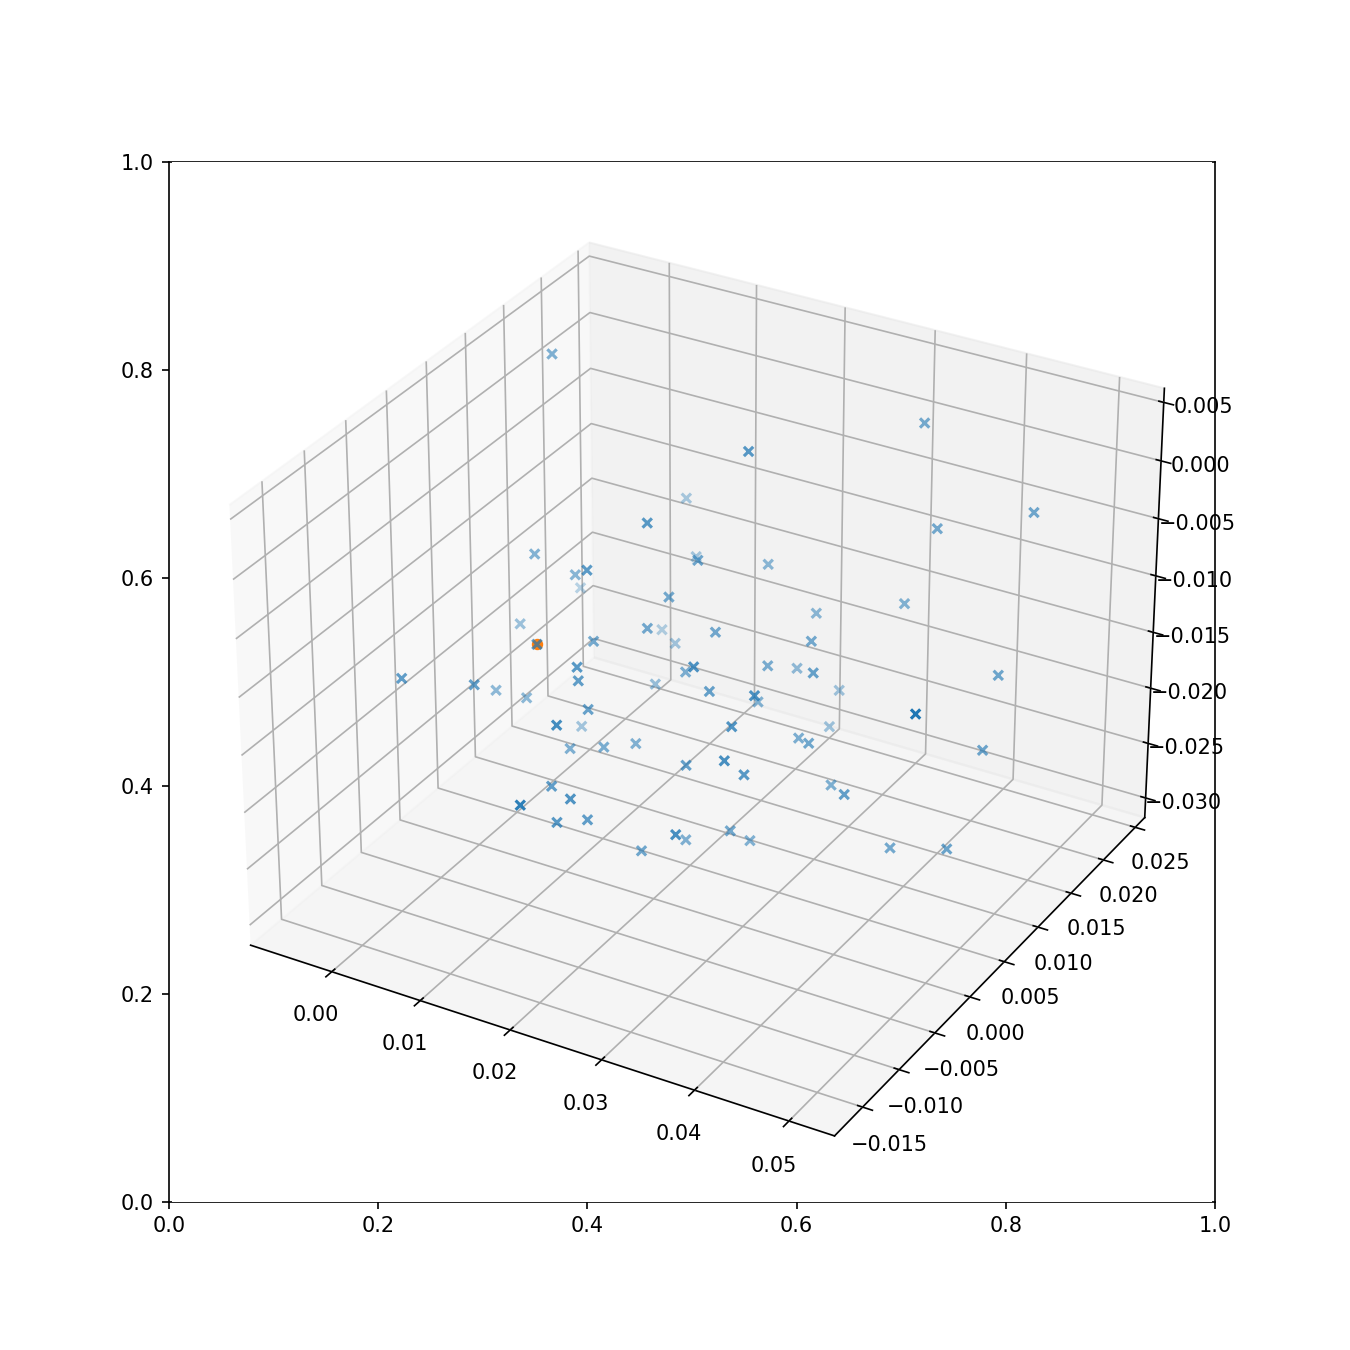

/home/otheruser/anaconda3/envs/tf2GPU/lib/python3.7/site-packages/ipykernel_launcher.py:567: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/otheruser/anaconda3/envs/tf2GPU/lib/python3.7/site-packages/ipykernel_launcher.py:568: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/otheruser/anaconda3/envs/tf2GPU/lib/python3.7/site-packages/ipykernel_launcher.py:569: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/otheruser/anaconda3/envs/tf2GPU/lib/python3.7/site-packages/ipykernel_launcher.py:572: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [1]:
import config
from config import *


%matplotlib notebook


def load_channels(obj):
    global base_xrf_img_dir, all_cells_Cu,all_cells_Zn,all_cells_Ca,all_cells_K,all_cells_P,all_cells_S,all_cells_Fe,all_cells_Ni,all_cells_TFY
    base_xrf_img_dir=os.path.split(fc.selected_path)[0]
    w_bin_info.disabled=False
    w_status.disabled=False
    
    slider.disabled=False
#     print('XRF image at : ',base_xrf_img_dir)
    a_Cu=os.path.join(base_xrf_img_dir,'Cu') + '/*.tif'
    a_Zn=os.path.join(base_xrf_img_dir,'Zn') + '/*.tif'
    a_Ca=os.path.join(base_xrf_img_dir,'Ca') + '/*.tif'
    a_K=os.path.join(base_xrf_img_dir,'K') + '/*.tif'
    a_P=os.path.join(base_xrf_img_dir,'P') + '/*.tif'
    a_S=os.path.join(base_xrf_img_dir,'S') + '/*.tif'
    a_Fe=os.path.join(base_xrf_img_dir,'Fe') + '/*.tif'
    a_Ni=os.path.join(base_xrf_img_dir,'Ni') + '/*.tif'
    a_TFY=os.path.join(base_xrf_img_dir,'TFY') + '/*.tif'
#     print(a_Cu)

    

    all_cells_Cu=sorted(glob.glob(a_Cu)) 
    all_cells_Zn=sorted(glob.glob(a_Zn)) 
    all_cells_Ca=sorted(glob.glob(a_Ca)) 
    all_cells_K=sorted(glob.glob(a_K)) 
    all_cells_P=sorted(glob.glob(a_P)) 
    all_cells_S=sorted(glob.glob(a_S)) 
    all_cells_Fe=sorted(glob.glob(a_Fe)) 
    all_cells_Ni=sorted(glob.glob(a_Ni)) 
    all_cells_TFY=sorted(glob.glob(a_TFY)) 
    
    w_status.value='Load cell images to view from :' + base_xrf_img_dir
    
    slider.max=len(all_cells_Cu)-1
    
    
    

def load_image(obj):
    global d, P
    global b_Cu, b_Zn, b_Ca, b_K, b_P, b_S, b_Fe, b_Ni, b_TFY
    global arr_Cu,arr_Zn,arr_Ca,arr_K,arr_P,arr_S,arr_Fe,arr_Ni,arr_TFY
    global stored_patch_h5_file_path
    global current_cell_file_index
    idx=slider.value
    
    arr_Cu=np.array(all_cells_Cu)
    arr_Zn=np.array(all_cells_Zn)
    arr_Ca=np.array(all_cells_Ca)
    arr_K=np.array(all_cells_K)
    arr_P=np.array(all_cells_P)
    arr_S=np.array(all_cells_S)
    arr_Fe=np.array(all_cells_Fe)
    arr_Ni=np.array(all_cells_Ni)
    arr_TFY=np.array(all_cells_TFY)
    
    b_Cu=tiff.imread(arr_Cu[idx])
    b_Zn=tiff.imread(arr_Zn[idx])
    b_Ca=tiff.imread(arr_Ca[idx])
    b_K=tiff.imread(arr_K[idx])
    b_P=tiff.imread(arr_P[idx])
    b_S=tiff.imread(arr_S[idx])
    b_Fe=tiff.imread(arr_Fe[idx])
    b_Ni=tiff.imread(arr_Ni[idx])
    b_TFY=tiff.imread(arr_Fe[idx])
        
    #Show info and status
    w_status.value='Use slider to select cells from the XRF image.\nUse buttons to accept or reject cells in bins. \n opened channel files' + '\n' + str(arr_Cu[idx]) + '\n' + str(arr_Zn[idx])  + '\n' + str(arr_Ca[idx]) + '\n' + str(arr_K[idx]) + '\n' + str(arr_P[idx]) + '\n' + str(arr_S[idx])
    xrf_file_key=os.path.split(arr_Cu[slider.value])[1].split('_')[0] + '_' +os.path.split(arr_Cu[slider.value])[1].split('_')[1] + '_' + os.path.split(arr_Cu[slider.value])[1].split('_')[2] + '_' + os.path.split(arr_Cu[slider.value])[1].split('_')[3]
    # shows the element and type of binary conversion

    
    
    #turn on for debug
#     print('opened channel files')
#     print(arr_Cu[idx])
#     print(arr_Zn[idx])
#     print(arr_Ca[idx])
#     print(arr_K[idx])
#     print(arr_P[idx])
#     print(arr_S[idx])
    
    
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    ax_2[0].clear()
    ax_2[1].clear()
    ax_2[2].clear()
    ax_3[0].clear()
    ax_3[1].clear()
    ax_3[2].clear()
    
    
    #images have flipped x and y
    
    img1=ax[0].imshow(b_Cu.T, interpolation='spline16');
    img2=ax[1].imshow(b_Zn.T, interpolation='spline16');
    img3=ax[2].imshow(b_Ca.T, interpolation='spline16');

    img4=ax_2[0].imshow(b_K.T, interpolation='spline16');
    img5=ax_2[1].imshow(b_P.T, interpolation='spline16');
    img6=ax_2[2].imshow(b_S.T, interpolation='spline16');
    
    img7=ax_3[0].imshow(b_Fe.T, interpolation='spline16');
    img8=ax_3[1].imshow(b_Ni.T, interpolation='spline16');
    img9=ax_3[2].imshow(b_TFY.T, interpolation='spline16');
    
    
    
    
    
    fig.colorbar(img1, cax=cax1, orientation='vertical')
    fig.colorbar(img2, cax=cax2, orientation='vertical')
    fig.colorbar(img3, cax=cax3, orientation='vertical')
    
    
    fig_2.colorbar(img4, cax=cax1_2, orientation='vertical')
    fig_2.colorbar(img5, cax=cax2_2, orientation='vertical')
    fig_2.colorbar(img6, cax=cax3_2, orientation='vertical')
    
    fig_3.colorbar(img7, cax=cax1_3, orientation='vertical')
    fig_3.colorbar(img8, cax=cax2_3, orientation='vertical')
    fig_3.colorbar(img9, cax=cax3_3, orientation='vertical')
    
    fig.colorbar(img1, cax=cax1, orientation='vertical').ax.tick_params(labelsize=4)
    fig.colorbar(img2, cax=cax2, orientation='vertical').ax.tick_params(labelsize=4)
    fig.colorbar(img3, cax=cax3, orientation='vertical').ax.tick_params(labelsize=4)
    
    fig_2.colorbar(img4, cax=cax1_2, orientation='vertical').ax.tick_params(labelsize=4)
    fig_2.colorbar(img5, cax=cax2_2, orientation='vertical').ax.tick_params(labelsize=4)
    fig_2.colorbar(img6, cax=cax3_2, orientation='vertical').ax.tick_params(labelsize=4)
    
    fig_3.colorbar(img7, cax=cax1_3, orientation='vertical').ax.tick_params(labelsize=4)
    fig_3.colorbar(img8, cax=cax2_3, orientation='vertical').ax.tick_params(labelsize=4)
    fig_3.colorbar(img9, cax=cax3_3, orientation='vertical').ax.tick_params(labelsize=4)
    
    
    fig.colorbar(img1, cax=cax1, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig.colorbar(img2, cax=cax2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig.colorbar(img3, cax=cax3, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    
    fig_2.colorbar(img4, cax=cax1_2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_2.colorbar(img5, cax=cax2_2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_2.colorbar(img6, cax=cax3_2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    
    fig_3.colorbar(img7, cax=cax1_3, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_3.colorbar(img8, cax=cax2_3, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_3.colorbar(img9, cax=cax3_3, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    
    
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    
    ax_2[0].axis('off')
    ax_2[1].axis('off')
    ax_2[2].axis('off')
    
    ax_3[0].axis('off')
    ax_3[1].axis('off')
    ax_3[2].axis('off')
    
    
    ax[0].set_title('Cu')
    ax[1].set_title('Zn')
    ax[2].set_title('Ca')
    
    ax_2[0].set_title('K')
    ax_2[1].set_title('P')
    ax_2[2].set_title('S')
    
    ax_3[0].set_title('Fe')
    ax_3[1].set_title('Ni')
    ax_3[2].set_title('TFY')

    
    
    fig.canvas.draw()
    fig_2.canvas.draw()
    fig_3.canvas.draw()


    fig.show()
    fig_2.show()
    fig_3.show()
    
    
    #14 is the half of mini_patch_size, so take one channel image and its sides
    ax[0].plot(b_Cu.shape[0]/2, b_Cu.shape[0]/2, 'w+', markersize=CROSS_HAIR_SIZE)
    ax[1].plot(b_Cu.shape[0]/2, b_Cu.shape[0]/2, 'w+', markersize=CROSS_HAIR_SIZE)
    ax[2].plot(b_Cu.shape[0]/2, b_Cu.shape[0]/2, 'w+', markersize=CROSS_HAIR_SIZE)
    ax_2[0].plot(b_Cu.shape[0]/2, b_Cu.shape[0]/2, 'w+', markersize=CROSS_HAIR_SIZE)
    ax_2[1].plot(b_Cu.shape[0]/2, b_Cu.shape[0]/2, 'w+', markersize=CROSS_HAIR_SIZE)
    ax_2[2].plot(b_Cu.shape[0]/2, b_Cu.shape[0]/2, 'w+', markersize=CROSS_HAIR_SIZE)
    ax_3[0].plot(b_Cu.shape[0]/2, b_Cu.shape[0]/2, 'w+', markersize=CROSS_HAIR_SIZE)
    ax_3[1].plot(b_Cu.shape[0]/2, b_Cu.shape[0]/2, 'w+', markersize=CROSS_HAIR_SIZE)
    ax_3[2].plot(b_Cu.shape[0]/2, b_Cu.shape[0]/2, 'w+', markersize=CROSS_HAIR_SIZE)
    
    
    
    # open main .h5 file and mark cross-hair there
    
    #load and plot original image first
    

    stored_main_h5_file=os.path.split(base_xrf_img_dir+os.path.split(fc.selected_filename)[0])[1] + '.h5'# filename of stored .h5 xrf_image

    stored_main_h5_file_path = os.path.join(base_xrf_img_dir+os.path.split(fc.selected_filename)[0],stored_main_h5_file) #path to stored main .h5 file


    norm_ch = NORM_CH
    value_offset=VALUE_OFFSET
    xrfdata = collections.defaultdict(list)


    with h5py.File(stored_main_h5_file_path, 'r') as dat:
            groups= list(dat.keys())
            maps= list(dat['MAPS'].keys())
            chs = dat['MAPS/channel_names'][:].astype(str).tolist()
            xrf = dat['MAPS/XRF_roi'][:]
            scaler_names = dat['MAPS/scaler_names'][:].astype(str).tolist()
            scaler_val = dat['MAPS/scalers'][:]
            norm = scaler_val[scaler_names.index(norm_ch)]
            for e in chs:
                chidx = chs.index(e)
                xrfdata[e].append(xrf[chidx]/norm)
            xrfdata['scan_num'].append(fc.selected_filename)
            xrfdata['x_axis'].append(dat['exchange_4/x_axis'][:])
            xrfdata['y_axis'].append(dat['exchange_4/y_axis'][:])
    xrfdata = pd.DataFrame(xrfdata)

    
    elms=[w_preview_elm.value] # Only TFY for now, read from ement dropdown to see other channels
    for i, row in xrfdata.iterrows():
            sc = row['scan_num'][0:row['scan_num'].index('.')]
            for e in elms:
                d = row[e]

                d[np.isnan(d) | np.isinf(d)] = 0
                norm_d = (d - np.min(d)) / (np.max(d) - np.min(d)) + value_offset
                ss = np.round(np.abs(np.diff(row['x_axis']))[0], 2)    
                x_d,y_d=row['x_axis'], row['y_axis']

    
    
    w_bin_info.value='Key: '+ os.path.split(arr_Cu[slider.value])[1] + '\n' +'Bin. Elm.: '   + os.path.split(arr_Cu[slider.value])[1].split('_')[-2] + '\n' + 'Conv.: '+ os.path.split(arr_Cu[slider.value])[1].split('_')[-4] + '\n' + 'Total cell count = ' + str(len(all_cells_Cu)) 
    w_bin_info.value=w_bin_info.value + '\n' + 'Main image shape : ' + str(d.shape[0]) + 'x' + str(d.shape[1])

    
    
    
    ax_master.clear()      

#     img_master = ax_master.pcolormesh(x_d, y_d, d, shading = 'gouraud')
    img_master = ax_master.imshow(d.T)
    ax_master.axis('off')
    scalebar_master = ScaleBar( SCALE_UNIT_FACTOR*(x_d[1]-x_d[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax_master.add_artist(scalebar_master)
    ax_master.set_title('Main image Channel: ' + elms[0])

    # Now get cell centers by reading the patch data structure first then the centers for the corresponding patch
    
    #first get the path of the stored patch for corresponding binary conversion and conversion element
    #filename of the stored patch
    stored_patch_h5_file=os.path.split(base_xrf_img_dir+os.path.split(fc.selected_filename)[0])[1] + '_' + 'DEC' + '_' + 'Patches' + '_' + os.path.split(arr_Cu[slider.value])[1].split('_')[-4] + '_' + 'BEC' + '_' + os.path.split(arr_Cu[slider.value])[1].split('_')[-2] + '.h5'
    #path to the stored patch


    stored_patch_h5_file_path= os.path.join(base_xrf_img_dir+os.path.split(fc.selected_filename)[0],stored_patch_h5_file) 


    
    
    #update status
    
    w_status.value=w_status.value+ '\n patches stored at: ' + stored_patch_h5_file_path
    
    
    #mark the currently viewed cells location on the main image channel
    P = Patches2D(d.shape, initialize_by = "file", fpath=stored_patch_h5_file_path)
    #get the patch index needed for a cell from the filename
    center_in_main = P.centers()[int(os.path.split(arr_Cu[idx])[1].split('_')[-1].replace('.tif', ''))]
    
    current_cell_file_index = int(os.path.split(arr_Cu[idx])[1].split('_')[-1].replace('.tif', ''))
    
    #b_Cu.shape[0]/2 is the half of crop_size or base_patch_width
    # we get centers from the patches2d data structure, but the bounding box requires corner points
    
    cell_bbox = patches.Rectangle((center_in_main[0]-b_Cu.shape[0]/2, center_in_main[1]-b_Cu.shape[0]/2), 28, 28, linewidth=2, edgecolor='r', facecolor='none')
    ax_master.add_patch(cell_bbox)




    
    # OR PLOT cross-hair to mark location in main image
    ax_master.plot(center_in_main[0], center_in_main[1], 'w+', markersize=CROSS_HAIR_SIZE)
    


    
    return
    
def find_most_similar(obj):
    
    
    all_cells_img = P.extract(d, 28)  # create an array with cells based on current preview element

    


    #tSNE-2D block

    #method
    tsne = TSNE(
        n_components=2,
        perplexity=3,
        metric="euclidean",
        n_jobs=8,
        random_state=42,
        verbose=False,
    )

    embeddings = tsne.fit(all_cells_img.reshape(all_cells_img.shape[0], all_cells_img.shape[1]*all_cells_img.shape[2]))

    vis_x = embeddings[:, 0]
    vis_y = embeddings[:, 1]
    ax_latent.clear()
    ax_latent.scatter(embeddings[:, 0], embeddings[:, 1], marker='x')
    # ax_master.scatter(vis_x, vis_y, c=combined_labels_Cu, marker='x') #If labels are available
    # plt.colorbar(ticks=range(2))
    # plt.clim(-0.5, 9.5)
    plt.show()

    ax_latent.scatter(embeddings[current_cell_file_index, 0], embeddings[current_cell_file_index, 1], marker='o')

    for i, txt in enumerate(np.arange(all_cells_img.shape[0])):
        ax_latent.annotate(txt, (embeddings[:, 0][i], embeddings[:, 1][i]), fontsize=8)

    # find the three smallest L2-norms in tSNE latent variable space
    dist = embeddings -  embeddings[current_cell_file_index]
    dist = np.linalg.norm(dist, axis=1)

    P.add_features(dist, names = ['L2-norm'])
    P_selected = P.select_by_feature(2, ife = -1, selection_by='lowest')


    center_recom_1 = P.centers()[np.argsort(P['L2-norm'])[1]]  #1st recom
    center_recom_2 = P.centers()[np.argsort(P['L2-norm'])[2]]  #2nd recom  

    w_status.value = 'Recom. Cell indices : ' + str(np.argsort(P['L2-norm'])) 

    #put in dictionary

    # Draw boxes of recommendations in main preview image
    #center of first recommendation

    center_recom_1_bbox = patches.Rectangle((center_recom_1[0]-b_Cu.shape[0]/2,center_recom_1[1]-b_Cu.shape[0]/2)  , 28, 28, linewidth=2, edgecolor='g', facecolor='none')
    # center_recom_1_bbox = patches.Rectangle((center_recom_1[0]-b_Cu.shape[0]/2, center_recom_1[1]-b_Cu.shape[0]/2), 28, 28, linewidth=2, edgecolor='g', facecolor='none')
    ax_master.add_patch(center_recom_1_bbox)


    #center of second recommendation

    center_recom_2_bbox = patches.Rectangle((center_recom_2[0]-b_Cu.shape[0]/2,center_recom_2[1]-b_Cu.shape[0]/2)  , 28, 28, linewidth=2, edgecolor='b', facecolor='none')
    # center_recom_2_bbox = patches.Rectangle((center_recom_2[0]-b_Cu.shape[0]/2, center_recom_2[1]-b_Cu.shape[0]/2), 28, 28, linewidth=2, edgecolor='b', facecolor='none')
    ax_master.add_patch(center_recom_2_bbox)   


    # Show selected cell and two recommendations in new axes

    ax_recom[0].clear()
    ax_recom[1].clear()
    ax_recom[2].clear()

    #images have flipped x and y

    img_recom_1=ax_recom[0].imshow(all_cells_img[np.argsort(P['L2-norm'])[0]].T, interpolation='spline16');
    img_recom_2=ax_recom[1].imshow(all_cells_img[np.argsort(P['L2-norm'])[1]].T, interpolation='spline16');
    img_recom_3=ax_recom[2].imshow(all_cells_img[np.argsort(P['L2-norm'])[2]].T, interpolation='spline16');


    fig_recom.colorbar(img_recom_1, cax=cax_recom_1, orientation='vertical')
    fig_recom.colorbar(img_recom_2, cax=cax_recom_2, orientation='vertical')
    fig_recom.colorbar(img_recom_3, cax=cax_recom_3, orientation='vertical')

    fig_recom.colorbar(img_recom_1, cax=cax_recom_1, orientation='vertical').ax.tick_params(labelsize=4)
    fig_recom.colorbar(img_recom_2, cax=cax_recom_2, orientation='vertical').ax.tick_params(labelsize=4)
    fig_recom.colorbar(img_recom_3, cax=cax_recom_3, orientation='vertical').ax.tick_params(labelsize=4)

    fig_recom.colorbar(img_recom_1, cax=cax_recom_1, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_recom.colorbar(img_recom_2, cax=cax_recom_2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_recom.colorbar(img_recom_3, cax=cax_recom_3, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))



    ax_recom[0].axis('off')
    ax_recom[1].axis('off')
    ax_recom[2].axis('off')



    ax_recom[0].set_title('Selected cell')
    ax_recom[1].set_title('Recom. 1 ')
    ax_recom[2].set_title('Recom. 2 ')

    fig_recom.canvas.draw()


    fig_recom.show()

        

    

    
    
    
    
    
    
# annot_dir='annotated_XRF'
base__dir_path=os.path.join(os.path.join(os.path.dirname(os.getcwd()),annot_dir), 'raw_cells')
print("Extracted cells will be at: ", base__dir_path)  
print('Please open directory for an xrf image and select any tif file from any channel.')
    
tiff_dir = base__dir_path
default_path = tiff_dir 
fc = FileChooser(default_path)
fc.default_filename = '.tif'


w_preview_elm = widgets.Dropdown(options=['Cu','Zn','Ca', 'K', 'P', 'S', 'Fe', 'Ni','TFY'], description='Preview Element:', value='TFY' , style={'description_width': 'initial'}, disabled=False)

w_bin_info = widgets.Textarea(description='Info.:', 
                             value='File information' ,  
#                              style={'description_width': 'initial'},
                             layout=widgets.Layout(height="auto", width="auto"),
                             disabled=True)

w_status = widgets.Textarea(description='Status:', 
                             value='Status pane: \n Selected preview element will be used to mark locations of extracted cells ' ,  
#                              style={'description_width': 'initial'},
                             layout=widgets.Layout(height="auto", width="auto"),
                             disabled=True)

btn_fc = widgets.Button(description = "Load Channels")


btn_load_img = widgets.Button(description = "Load cell images")
btn_find_most_similar = widgets.Button(description = "Find Most Similiar", style={'description_width': 'initial'}, disabled=False)

w_sim_mthd_type = widgets.Dropdown(options=['RAE'], description='Method', value='RAE' , style={'description_width': 'initial'}, disabled=True)


slider = widgets.IntSlider(min=1, max=100, step=1, continuous_update=True, disabled=True)




display(HBox(children = [btn_fc, fc]))
display(HBox(children = [w_preview_elm]))
display(HBox(children = [w_bin_info,w_status]))
display(HBox(children = [slider]))
display(HBox(children = [btn_load_img, btn_find_most_similar, w_sim_mthd_type]))

global fig, ax,fig_2, ax_2, fig_3, ax_3 , fig_master, ax_master,fig_latent, ax_latent, fig_recom, ax_recom,fig_latent_3D, ax_latent_3D
global img1,img2,img3,img4,img5,img6
fig, ax = plt.subplots(1,3, figsize = FIGSIZE)
fig_2, ax_2 = plt.subplots(1,3, figsize = FIGSIZE)
fig_3, ax_3 = plt.subplots(1,3, figsize = FIGSIZE)




#play with the horizontal value to position the colorbars properly




cax1 = fig.add_axes(cbar_position1_annot)
cax2 = fig.add_axes(cbar_position2_annot)
cax3 = fig.add_axes(cbar_position3_annot)

cax1_2 = fig_2.add_axes(cbar_position1_annot)
cax2_2 = fig_2.add_axes(cbar_position2_annot)
cax3_2 = fig_2.add_axes(cbar_position3_annot)

cax1_3 = fig_3.add_axes(cbar_position1_annot)
cax2_3 = fig_3.add_axes(cbar_position2_annot)
cax3_3 = fig_3.add_axes(cbar_position3_annot)

# Turn on the axis value for debugging

cax1.axis('on')
cax2.axis('on')
cax3.axis('on')

cax1_2.axis('on')
cax2_2.axis('on')
cax3_2.axis('on')

cax1_3.axis('on')
cax2_3.axis('on')
cax3_3.axis('on')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

ax_2[0].axis('off')
ax_2[1].axis('off')
ax_2[2].axis('off')

ax_3[0].axis('off')
ax_3[1].axis('off')
ax_3[2].axis('off')


ax[0].set_title('Cu')
ax[1].set_title('Zn')
ax[2].set_title('Ca')

ax_2[0].set_title('K')
ax_2[1].set_title('P')
ax_2[2].set_title('S')

ax_3[0].set_title('Fe')
ax_3[1].set_title('Ni')
ax_3[2].set_title('TFY')




fig_master, ax_master = plt.subplots(1,1, figsize = (9,9))
fig_latent, ax_latent = plt.subplots(1,1, figsize = (9,9))


ax_master.axis('off')
ax_master.set_title('Main image')

ax_latent.axis('off')
ax_latent.set_title('Latent dimensions or extracted features')


fig_recom, ax_recom = plt.subplots(1,3, figsize = FIGSIZE)

cax_recom_1 = fig_recom.add_axes(cbar_position1_annot)
cax_recom_2 = fig_recom.add_axes(cbar_position2_annot)
cax_recom_3 = fig_recom.add_axes(cbar_position3_annot)

fig_latent_3D, ax_latent_3D = plt.subplots(1,1, figsize = (9,9))
ax_latent_3D = fig_latent_3D.add_subplot(projection='3d')

# ax_latent_3D.axis('off')
ax_latent_3D.set_title('Latent dimensions or extracted features')


fig.tight_layout()
fig_2.tight_layout()
fig_3.tight_layout()
fig_master.tight_layout()
# fig_latent.tight_layout()
fig_recom.tight_layout()








btn_fc.on_click(load_channels)
btn_load_img.on_click(load_image)
btn_find_most_similar.on_click(find_most_similar)


In [2]:
all_cells_img = P.extract(d, 28)  # create an array with cells based on current preview element


In [3]:
#Allocate memory First
import tensorflow as tf
GPU_mem_limit=4.0
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=GPU_mem_limit*1000.0)])

    except RuntimeError as e:
        print(e)        
        

2021-12-16 13:58:09.266298: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-12-16 13:58:09.303799: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2021-12-16 13:58:09.303893: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-12-16 13:58:09.303972: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-12-16 13:58:09.304016: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-12-16 13:58:09.304063: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10

In [34]:
all_cells_img = P.extract(d, 28)  # create an array with cells based on current preview element

#Adding VAE

# INITIALIZERS

BASE_PATCH_WIDTH=28  #Width of the cell (pixels)

latent_dim=2

num_channels = 1

cell_types=2
noise_amplitude=0.000

# from sklearn.model_selection import train_test_split

# x_train, y_train, x_test, y_test= train_test_split(
#     combined_ar_Cu, combined_labels_Cu, test_size=0.30, random_state=42)

x_train = all_cells_img
x_test= all_cells_img
# y_train = all_cells_img_TFY


        
encoder,decoder=autoencoder(latent_dim,num_channels,BASE_PATCH_WIDTH,summary='no')






In [35]:
x_train.shape

(71, 28, 28)

In [45]:
threshold = threshold_otsu(x_train)
binarized_x_train = x_train > threshold

In [46]:
binarized_x_train

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[ True,  True, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [40]:
binarized_x_train=np.multiply(binarized_x_train, 1)

In [41]:
binarized_x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [42]:
binarized_x_train,binarized_x_test=noise_addition('binary',noise_amplitude,x_train,x_test)

In [47]:
binarized_x_train.dtype

dtype('bool')

In [48]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def viewer(index):
    plt.figure(figsize=(5,5))
    plt.imshow(binarized_x_train[index],cmap='gray')
    plt.colorbar(orientation='horizontal', shrink=0.8, location='top')
    plt.show()


interactive_image = interactive(viewer, index = (0,x_train.shape[0]-1))
output = interactive_image.children[-1]
# output.layout.height = '300px'
interactive_image

interactive(children=(IntSlider(value=35, description='index', max=70), Output()), _dom_classes=('widget-inter…

In [49]:
vae = Short_VAE(encoder, decoder,weight=1/2.0,regularization_type='L1',recon_type='bce')
vae.compile(optimizer='adam')


In [50]:
vae_one_channel=vae.fit(binarized_x_train, epochs=20, batch_size=1,verbose=False)  

#x_train.shape would be Cu, Ni, Ca n_extracted_cell, 28, 28, 3
#x_train.shape would be TFY n_extracted_cell, 28, 28, 1

# model_history(vae_plan_a,'kl')

<IPython.core.display.Javascript object>


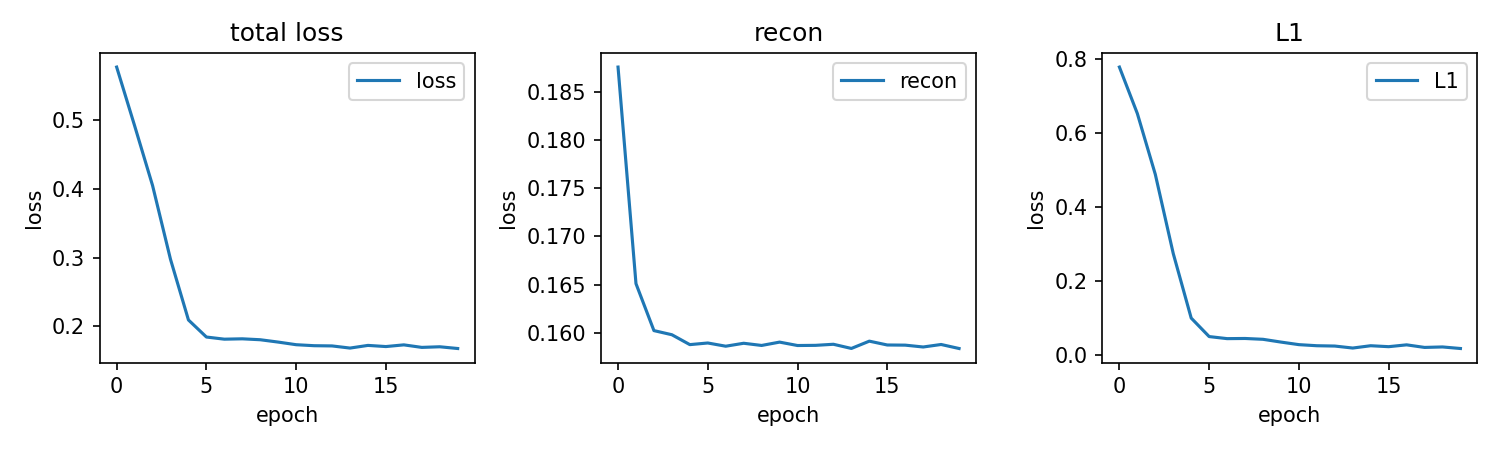

In [51]:
model_history(vae_one_channel,'L1')

<IPython.core.display.Javascript object>


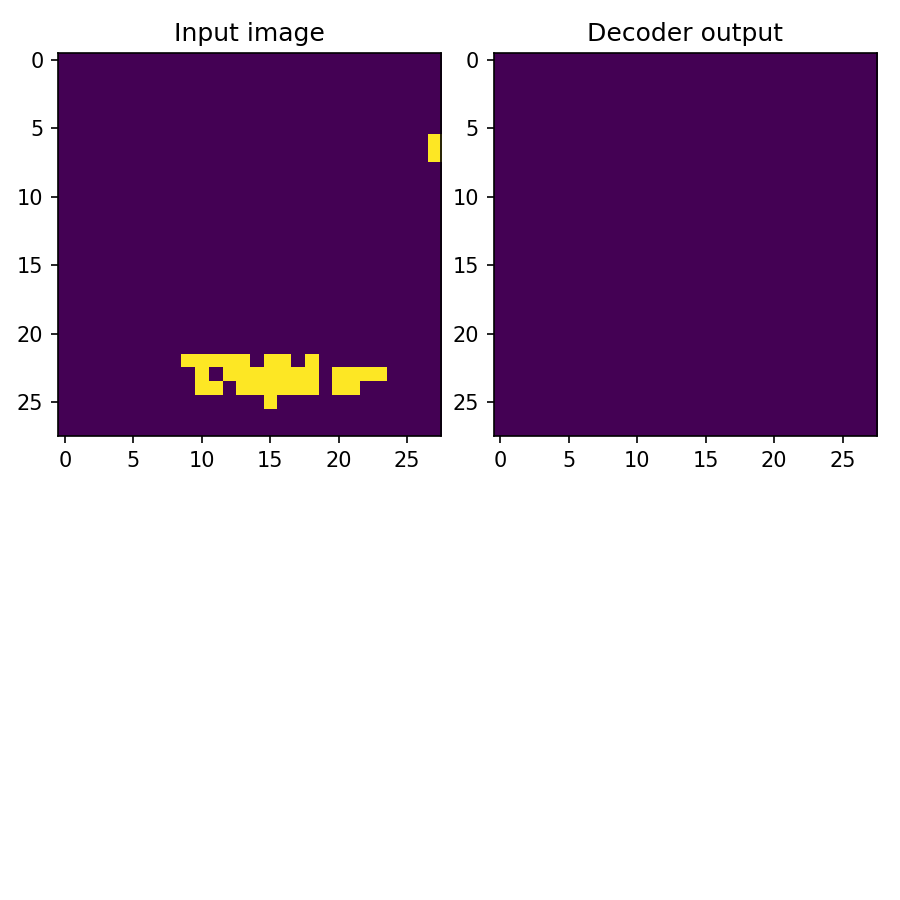

image no:  70


In [52]:
check_VAE_output(binarized_x_train,70,BASE_PATCH_WIDTH,encoder,decoder)

In [53]:
embeddings=np.asarray(encoder(x_train), dtype='float32') #[z_mean, z_log_var, z] we need the last 1

In [54]:
embeddings=embeddings[-1] 

In [55]:
embeddings.shape

(71, 3)

In [58]:
#for latent_dim = 2 results

vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
ax_latent.clear()
ax_latent.scatter(embeddings[:, 0], embeddings[:, 1], marker='x')
# ax_master.scatter(vis_x, vis_y, c=combined_labels_Cu, marker='x') #If labels are available
# plt.colorbar(ticks=range(2))
# plt.clim(-0.5, 9.5)
plt.show()

ax_latent.scatter(embeddings[current_cell_file_index, 0], embeddings[current_cell_file_index, 1], marker='o')

for i, txt in enumerate(np.arange(all_cells_img.shape[0])):
    ax_latent.annotate(txt, (embeddings[:, 0][i], embeddings[:, 1][i]), fontsize=8)

# find the three smallest L2-norms in tSNE latent variable space
dist = embeddings -  embeddings[current_cell_file_index]
dist = np.linalg.norm(dist, axis=1)

P.add_features(dist, names = ['L2-norm'])
P_selected = P.select_by_feature(2, ife = -1, selection_by='lowest')


center_recom_1 = P.centers()[np.argsort(P['L2-norm'])[1]]  #1st recom
center_recom_2 = P.centers()[np.argsort(P['L2-norm'])[2]]  #2nd recom  

w_status.value = 'Recom. Cell indices : ' + str(np.argsort(P['L2-norm'])) 

#put in dictionary

# Draw boxes of recommendations in main preview image
#center of first recommendation

center_recom_1_bbox = patches.Rectangle((center_recom_1[0]-b_Cu.shape[0]/2,center_recom_1[1]-b_Cu.shape[0]/2)  , 28, 28, linewidth=2, edgecolor='g', facecolor='none')
# center_recom_1_bbox = patches.Rectangle((center_recom_1[0]-b_Cu.shape[0]/2, center_recom_1[1]-b_Cu.shape[0]/2), 28, 28, linewidth=2, edgecolor='g', facecolor='none')
ax_master.add_patch(center_recom_1_bbox)


#center of second recommendation

center_recom_2_bbox = patches.Rectangle((center_recom_2[0]-b_Cu.shape[0]/2,center_recom_2[1]-b_Cu.shape[0]/2)  , 28, 28, linewidth=2, edgecolor='b', facecolor='none')
# center_recom_2_bbox = patches.Rectangle((center_recom_2[0]-b_Cu.shape[0]/2, center_recom_2[1]-b_Cu.shape[0]/2), 28, 28, linewidth=2, edgecolor='b', facecolor='none')
ax_master.add_patch(center_recom_2_bbox)   


# Show selected cell and two recommendations in new axes

ax_recom[0].clear()
ax_recom[1].clear()
ax_recom[2].clear()

#images have flipped x and y

img_recom_1=ax_recom[0].imshow(all_cells_img[np.argsort(P['L2-norm'])[0]].T, interpolation='spline16');
img_recom_2=ax_recom[1].imshow(all_cells_img[np.argsort(P['L2-norm'])[1]].T, interpolation='spline16');
img_recom_3=ax_recom[2].imshow(all_cells_img[np.argsort(P['L2-norm'])[2]].T, interpolation='spline16');


fig_recom.colorbar(img_recom_1, cax=cax_recom_1, orientation='vertical')
fig_recom.colorbar(img_recom_2, cax=cax_recom_2, orientation='vertical')
fig_recom.colorbar(img_recom_3, cax=cax_recom_3, orientation='vertical')

fig_recom.colorbar(img_recom_1, cax=cax_recom_1, orientation='vertical').ax.tick_params(labelsize=4)
fig_recom.colorbar(img_recom_2, cax=cax_recom_2, orientation='vertical').ax.tick_params(labelsize=4)
fig_recom.colorbar(img_recom_3, cax=cax_recom_3, orientation='vertical').ax.tick_params(labelsize=4)

fig_recom.colorbar(img_recom_1, cax=cax_recom_1, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
fig_recom.colorbar(img_recom_2, cax=cax_recom_2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
fig_recom.colorbar(img_recom_3, cax=cax_recom_3, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))



ax_recom[0].axis('off')
ax_recom[1].axis('off')
ax_recom[2].axis('off')



ax_recom[0].set_title('Selected cell')
ax_recom[1].set_title('Recom. 1 ')
ax_recom[2].set_title('Recom. 2 ')

fig_recom.canvas.draw()


fig_recom.show()


In [57]:
#for latent_dim = 3 results

vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
vis_z = embeddings[:, 2]
ax_latent_3D.clear()
ax_latent_3D.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], marker='x')
# ax_master.scatter(vis_x, vis_y, c=combined_labels_Cu, marker='x') #If labels are available
# plt.colorbar(ticks=range(2))
# plt.clim(-0.5, 9.5)
plt.show()

ax_latent_3D.scatter(embeddings[current_cell_file_index, 0], embeddings[current_cell_file_index, 1], embeddings[current_cell_file_index, 2], marker='o')

#         for i, txt in enumerate(np.arange(all_cells_img.shape[0])):
#             ax_latent_3D.text(embeddings[:, 0][i], embeddings[:, 1][i],embeddings[:, 2][i], str(txt) ,fontsize=8)

# find the three smallest L2-norms in tSNE latent variable space
dist = embeddings -  embeddings[current_cell_file_index]
dist = np.linalg.norm(dist, axis=1)

P.add_features(dist, names = ['L2-norm'])
P_selected = P.select_by_feature(2, ife = -1, selection_by='lowest')


center_recom_1 = P.centers()[np.argsort(P['L2-norm'])[1]]  #1st recom
center_recom_2 = P.centers()[np.argsort(P['L2-norm'])[2]]  #2nd recom  

w_status.value = 'Recom. Cell indices : ' + str(np.argsort(P['L2-norm'])) 

#put in dictionary

# Draw boxes of recommendations in main preview image
#center of first recommendation

center_recom_1_bbox = patches.Rectangle((center_recom_1[0]-b_Cu.shape[0]/2,center_recom_1[1]-b_Cu.shape[0]/2)  , 28, 28, linewidth=2, edgecolor='g', facecolor='none')
# center_recom_1_bbox = patches.Rectangle((center_recom_1[0]-b_Cu.shape[0]/2, center_recom_1[1]-b_Cu.shape[0]/2), 28, 28, linewidth=2, edgecolor='g', facecolor='none')
ax_master.add_patch(center_recom_1_bbox)


#center of second recommendation

center_recom_2_bbox = patches.Rectangle((center_recom_2[0]-b_Cu.shape[0]/2,center_recom_2[1]-b_Cu.shape[0]/2)  , 28, 28, linewidth=2, edgecolor='b', facecolor='none')
# center_recom_2_bbox = patches.Rectangle((center_recom_2[0]-b_Cu.shape[0]/2, center_recom_2[1]-b_Cu.shape[0]/2), 28, 28, linewidth=2, edgecolor='b', facecolor='none')
ax_master.add_patch(center_recom_2_bbox)   


# Show selected cell and two recommendations in new axes

ax_recom[0].clear()
ax_recom[1].clear()
ax_recom[2].clear()

#images have flipped x and y

img_recom_1=ax_recom[0].imshow(all_cells_img[np.argsort(P['L2-norm'])[0]].T, interpolation='spline16');
img_recom_2=ax_recom[1].imshow(all_cells_img[np.argsort(P['L2-norm'])[1]].T, interpolation='spline16');
img_recom_3=ax_recom[2].imshow(all_cells_img[np.argsort(P['L2-norm'])[2]].T, interpolation='spline16');


fig_recom.colorbar(img_recom_1, cax=cax_recom_1, orientation='vertical')
fig_recom.colorbar(img_recom_2, cax=cax_recom_2, orientation='vertical')
fig_recom.colorbar(img_recom_3, cax=cax_recom_3, orientation='vertical')

fig_recom.colorbar(img_recom_1, cax=cax_recom_1, orientation='vertical').ax.tick_params(labelsize=4)
fig_recom.colorbar(img_recom_2, cax=cax_recom_2, orientation='vertical').ax.tick_params(labelsize=4)
fig_recom.colorbar(img_recom_3, cax=cax_recom_3, orientation='vertical').ax.tick_params(labelsize=4)

fig_recom.colorbar(img_recom_1, cax=cax_recom_1, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
fig_recom.colorbar(img_recom_2, cax=cax_recom_2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
fig_recom.colorbar(img_recom_3, cax=cax_recom_3, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))



ax_recom[0].axis('off')
ax_recom[1].axis('off')
ax_recom[2].axis('off')



ax_recom[0].set_title('Selected cell')
ax_recom[1].set_title('Recom. 1 ')
ax_recom[2].set_title('Recom. 2 ')

fig_recom.canvas.draw()


fig_recom.show()


In [23]:
#end!